# Unconfined Aquifer Test
**This example is taken from Kruseman and de Ridder (1970).**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ttim import *
import pandas as pd

Set basic parameters for the model:

In [2]:
b = -21 #aquifer thickness in m
r = 90 #distance from observation wells to pumping well in m
Q = 873 #constant discharge in m^3/d

Load data of two piezometers:

In [3]:
data1 = np.loadtxt('data/venne_shallow.txt', skiprows=1)
ts = data1[:, 0] / 60 / 24 #convert min to days
hs = data1[:, 1]

data2 = np.loadtxt('data/venne_deep.txt', skiprows=1)
td = data2[:, 0] / 60 / 24 #convert min to days
hd = data2[:, 1]

Create conceptual one-layer model:

In [4]:
ml_1 = Model3D(kaq=10, z=[0, b], Saq=1e-4, tmin=1e-4, tmax=1.1)
w_1 = Well(ml_1, xw=0, yw=0, rw=0.1, tsandQ=[(0, Q)])
ml_1.solve()

self.neq  1
solution complete


Calibrate with data of two piezometers respectively:

In [5]:
#calibrate with data of shallow piezometer
#unknown parameters: kaq, Saq
ca_1 = Calibrate(ml_1)
ca_1.set_parameter(name='kaq0', initial=10)
ca_1.set_parameter(name='Saq0', initial=1e-4)
ca_1.series(name='obs', x=r, y=0, t=ts, h=hs, layer=0)
ca_1.fit()

.............................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 19
    # variables        = 2
    chi-square         = 2.3691e-04
    reduced chi-square = 1.3936e-05
    Akaike info crit   = -210.553192
    Bayesian info crit = -208.664314
[[Variables]]
    kaq0:  136.469285 +/- 5.82623528 (4.27%) (init = 10)
    Saq0:  0.01672407 +/- 0.00131400 (7.86%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.809


In [6]:
display(ca_1.parameters)
print('RMSE:', ca_1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,136.469,5.826235,4.26926,-inf,inf,10,[136.46928505810396]
Saq0,0.0167241,0.001314,7.85692,-inf,inf,0.0001,[0.01672406931266408]


RMSE: 0.003531132513897005


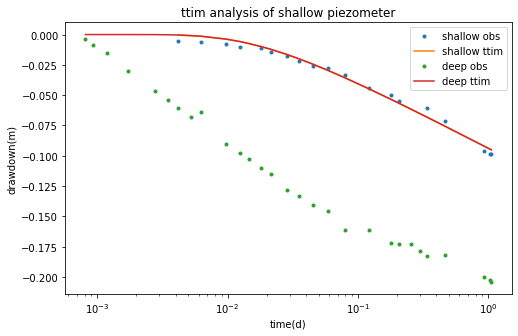

In [7]:
hs_1 = ml_1.head(r, 0, ts)
hd_1 = ml_1.head(r, 0, td)
plt.figure(figsize=(8, 5))
plt.semilogx(ts, hs, '.', label='shallow obs')
plt.semilogx(ts, hs_1[0], label='shallow ttim')
plt.semilogx(td, hd, '.', label='deep obs')
plt.semilogx(td, hd_1[0], label='deep ttim')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim analysis of shallow piezometer')
plt.legend();

In [8]:
#Calibrate with deep piezometer
#unknown parameters: kay, Saq
ca_2 = Calibrate(ml_1)
ca_2.set_parameter(name='kaq0', initial=10)
ca_2.set_parameter(name='Saq0', initial=1e-4)
ca_2.series(name='obs', x=r, y=0, t=td, h=hd, layer=0)
ca_2.fit()

..................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 29
    # variables        = 2
    chi-square         = 0.00294675
    reduced chi-square = 1.0914e-04
    Akaike info crit   = -262.636144
    Bayesian info crit = -259.901553
[[Variables]]
    kaq0:  116.576664 +/- 4.33980927 (3.72%) (init = 10)
    Saq0:  3.4576e-04 +/- 5.1114e-05 (14.78%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.873


In [9]:
display(ca_2.parameters)
print('RMSE:', ca_2.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,116.577,4.339809,3.72271,-inf,inf,10,[116.57666407791346]
Saq0,0.000345761,0.000051,14.783,-inf,inf,0.0001,[0.00034576112845901126]


RMSE: 0.010080273329140315


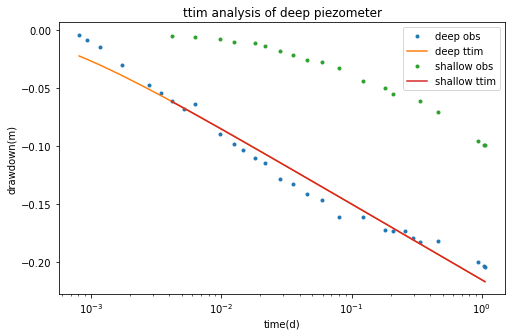

In [10]:
hd_2 = ml_1.head(r, 0, td)
hs_2 = ml_1.head(r, 0, ts)
plt.figure(figsize=(8, 5))
plt.semilogx(td, hd, '.', label='deep obs')
plt.semilogx(td, hd_2[0], label='deep ttim')
plt.semilogx(ts, hs, '.', label='shallow obs')
plt.semilogx(ts, hs_2[0], label='shallow ttim')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim analysis of deep piezometer')
plt.legend();

Create conceptual model with n-layers:

In [11]:
nlay = 21 #number of layers
zlayers = np.linspace(0, b, nlay + 1) #elevation of each layer
Saq = 1e-4 * np.ones(nlay)
Saq[0] = 0.1

In [12]:
ml_2 = Model3D(kaq=10, z=zlayers, Saq=Saq, kzoverkh=0.1, phreatictop=True, \
              tmin=1e-4, tmax=1.1)
w_2 = Well(ml_2, xw=0, yw=0, rw=0.1, tsandQ=[(0, Q)], layers=range(nlay))
ml_2.solve()

self.neq  21
solution complete


Calibrate with two piezometers simultaneously:

aquifers with same kaq and Saq  
unknown parameters: kaq, Saq, kzoverkh

In [13]:
ca_3 = Calibrate(ml_2)
ca_3.set_parameter(name='kaq0_20', initial=10)
ca_3.set_parameter(name='Saq0', initial=0.2)
ca_3.set_parameter(name='Saq1_20', initial=1e-4)
ca_3.set_parameter_by_reference(name='kzoverkh', parameter=ml_2.aq.kzoverkh[:], \
                               initial=0.1, pmin=0.01)
ca_3.series(name='obs1', x=r, y=0, layer=1,t=ts, h=hs)
ca_3.series(name='obs2', x=r, y=0, layer=15, t=td, h=hd)
ca_3.fit(report=True)

............................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 48
    # variables        = 4
    chi-square         = 0.00474318
    reduced chi-square = 1.0780e-04
    Akaike info crit   = -434.667919
    Bayesian info crit = -427.183115
[[Variables]]
    kaq0_20:   31.5792604 +/- 0.75573096 (2.39%) (init = 10)
    Saq0:      0.05541542 +/- 0.00380254 (6.86%) (init = 0.2)
    Saq1_20:   3.4725e-05 +/- 2.4525e-06 (7.06%) (init = 0.0001)
    kzoverkh:  0.01001515 +/- 1.1683e-04 (1.17%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_20, kzoverkh) = -0.517
    C(kaq0_20, Saq0)     = -0.326
    C(kaq0_20, Saq1_20)  = -0.279
    C(Saq0, kzoverkh)    = -0.126
    C(Saq1_20, kzoverkh) =  0.123


In [14]:
display(ca_3.parameters)
print('RMSE:', ca_3.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_20,31.5793,0.755731,2.39312,-inf,inf,10,"[31.579260407774143, 31.579260407774143, 31.57..."
Saq0,0.0554154,0.003803,6.86188,-inf,inf,0.2,[0.05541542451273692]
Saq1_20,3.47254e-05,0.000002,7.06255,-inf,inf,0.0001,"[3.47254241180992e-05, 3.47254241180992e-05, 3..."
kzoverkh,0.0100151,0.000117,1.16658,0.01,inf,0.1,"[0.01001514532231007, 0.01001514532231007, 0.0..."


RMSE: 0.009940637191248936


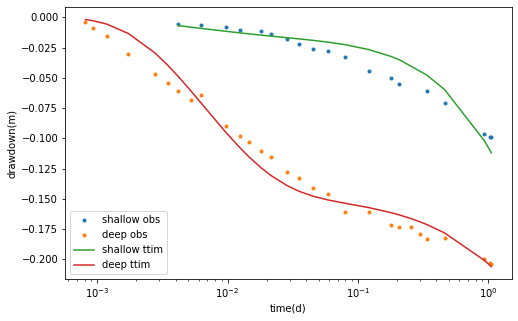

In [15]:
hs_3 = ml_2.head(x=r, y=0, t=ts, layers=1)
hd_3 = ml_2.head(x=r, y=0, t=td, layers=15)
plt.figure(figsize = (8, 5))
plt.semilogx(ts, hs, '.', label='shallow obs')
plt.semilogx(td, hd, '.', label='deep obs')
plt.semilogx(ts, hs_3[0], label='shallow ttim')
plt.semilogx(td, hd_3[0], label='deep ttim')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

aquifer with stratified Saq  
unknown parameters: kaq, Saq, kzoverkh

In [16]:
ml_3 = Model3D(kaq=10, z=zlayers, Saq=Saq, kzoverkh=0.1, phreatictop=True, \
              tmin=1e-4, tmax=1.1)
w_3 = Well(ml_3, xw=0, yw=0, rw=0.1, tsandQ=[(0, Q)], layers=range(nlay))
ml_3.solve()

self.neq  21
solution complete


In [17]:
ca_4 = Calibrate(ml_3)
ca_4.set_parameter(name='kaq0_20', initial=50)
ca_4.set_parameter(name='Saq0', initial=0.1)
ca_4.set_parameter(name='Saq1_7', initial=1e-4, pmin=0)
ca_4.set_parameter(name='Saq7_20', initial=1e-4, pmin=0)
ca_4.set_parameter_by_reference(name='kzoverkh', parameter=ml_3.aq.kzoverkh[:], \
                               initial=0.1, pmin=0)
ca_4.series(name='obs1', x=r, y=0, layer=1,t=ts, h=hs)
ca_4.series(name='obs2', x=r, y=0, layer=15, t=td, h=hd)
ca_4.fit(report=True)

.............................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 106
    # data points      = 48
    # variables        = 5
    chi-square         = 5.6239e-04
    reduced chi-square = 1.3079e-05
    Akaike info crit   = -535.016761
    Bayesian info crit = -525.660756
[[Variables]]
    kaq0_20:   74.9208569 +/- 2.27496608 (3.04%) (init = 50)
    Saq0:      0.02057828 +/- 0.00155901 (7.58%) (init = 0.1)
    Saq1_7:    4.5145e-04 +/- 5.8381e-05 (12.93%) (init = 0.0001)
    Saq7_20:   2.3115e-05 +/- 1.1161e-06 (4.83%) (init = 0.0001)
    kzoverkh:  3.7487e-04 +/- 7.8565e-05 (20.96%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_20, kzoverkh) = -0.965
    C(kaq0_20, Saq7_20)  = -0.755
    C(Saq1_7, kzoverkh)  = -0.736
    C(Saq7_20, kzoverkh) =  0.709
    C(kaq0_20, Saq1_7)   =  0.629
    C(kaq0_20, Saq0)     = -0.609
   

In [18]:
display(ca_4.parameters)
print('RMSE:', ca_4.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_20,74.9209,2.274966,3.03649,-inf,inf,50,"[74.92085686643718, 74.92085686643718, 74.9208..."
Saq0,0.0205783,0.001559,7.576,-inf,inf,0.1,[0.02057828028722851]
Saq1_7,0.000451452,0.000058,12.9319,0.0,inf,0.0001,"[0.0004514519384575255, 0.0004514519384575255,..."
Saq7_20,2.31146e-05,0.000001,4.82869,0.0,inf,0.0001,"[2.3114632324849893e-05, 2.3114632324849893e-0..."
kzoverkh,0.000374873,0.000079,20.9576,0.0,inf,0.1,"[0.00037487333092922626, 0.0003748733309292262..."


RMSE: 0.003422931514726531


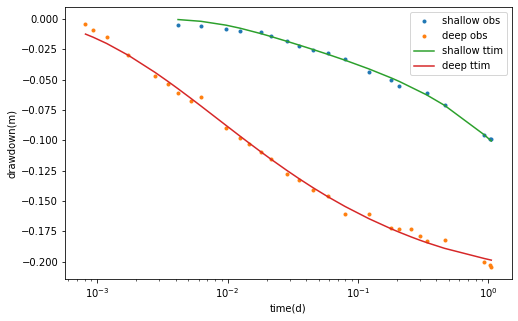

In [19]:
hs_4 = ml_3.head(x=r, y=0, t=ts, layers=1)
hd_4 = ml_3.head(x=r, y=0, t=td, layers=15)
plt.figure(figsize = (8, 5))
plt.semilogx(ts, hs, '.', label='shallow obs')
plt.semilogx(td, hd, '.', label='deep obs')
plt.semilogx(ts, hs_4[0], label='shallow ttim')
plt.semilogx(td, hd_4[0], label='deep ttim')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

## Summary of values presented in Kruseman and de Ridder (1970)

K&dR applies graphical analysis. Only the drawdown data of deep piezometer is used to estimate unknown parameters.AQTESOLV simulates this pumping test in the same way. The table shown below sumarrizes results of different methods applied to data of deep piezometer only.

In [20]:
t1 = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]', 'Sy [-]', 'kz/kh'], \
                 index=['K&dR', 'AQTESOLV', 'MLU', 'ttim'])
t1.loc['K&dR'] = [73, 2.476e-05, 0.005, 0.000548]
t1.loc['AQTESOLV'] = [63.805, 2.663e-05, 0.011, 0.000690]
t1.loc['MLU'] = [74.657, 2.767e-05, 0.005, 0.000737]
t1.iloc[3, 0:2] = ca_2.parameters['optimal'].values 
t1['RMSE'] = ['-', 0.003041, 0.003216, ca_2.rmse()]
t1

,k [m/d],Ss [1/m],Sy [-],kz/kh,RMSE
K&dR,73,2.476e-05,0.005,0.000548,-
AQTESOLV,63.805,2.663e-05,0.011,0.00069,0.003041
MLU,74.657,2.767e-05,0.005,0.000737,0.003216
ttim,116.577,0.000345761,NaN,NaN,0.0100803


To optimize the conceptual model to be more realistic, multilayer model is applied. Table shown below sumarrizes results of MLU and ttim simulated with both piezometers.

In [21]:
t2 = pd.DataFrame(columns=['k [m/d]', 'Sy [-]', 'Ss [1/m]','kzoverkh'], \
                 index=['MLU', 'ttim-multilayer', 'ttim-stratified Ss'])
t2.loc['MLU'] = [62.657, 0.0012, 2.790e-05, 0.002595]
t2.loc['ttim-multilayer'] = ca_3.parameters['optimal'].values
t2.iloc[2, 0:2] = ca_4.parameters['optimal'].values[0:2]
t2.iloc[2, 2:4] = ca_4.parameters['optimal'].values[3:5]
t2['RMSE'] = [0.013540, ca_3.rmse(), ca_4.rmse()]
t2

,k [m/d],Sy [-],Ss [1/m],kzoverkh,RMSE
MLU,62.657,0.0012,2.79e-05,0.002595,0.013540
ttim-multilayer,31.5793,0.0554154,3.47254e-05,0.0100151,0.009941
ttim-stratified Ss,74.9209,0.0205783,2.31146e-05,0.000374873,0.003423
